In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from IPython.display import Image
from plotly.subplots import make_subplots
import plotly.offline
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
plotly.offline.init_notebook_mode(connected=True)
from matplotlib import animation, rc; rc('animation', html='jshtml')
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np

In [2]:
k_2022 = pd.read_csv('kaggle_survey_2022_responses.csv', low_memory=False)
k_2021 = pd.read_csv('kaggle_survey_2021_responses.csv', low_memory=False)
k_2020 = pd.read_csv('kaggle_survey_2020_responses.csv', low_memory=False)
k_2019 = pd.read_csv('2019multiple_choice_responses.csv', low_memory=False)
k_2018 = pd.read_csv('2018multipleChoiceResponses.csv',low_memory=False)

In [3]:
class clr:
    S = '\033[1m' + '\033[30m'
    E = '\033[0m'
    

#my_colors = ['#DEF2F1','#3AAFA9','#2B7A78','#112D32']
my_colors = ['#def2f1', '#a1d3d0', '#6eb2ae', '#47908e', '#2d6e6e', '#1d4c4f', '#112d32','#b5b5b5']
my_colors_1 = ['#1f1f21', '#3b3c3e', '#5b5c5d', '#7c7d7f', '#9fa0a2', '#c3c4c6', '#e9eaec']
CMAP1 = ListedColormap(my_colors)

In [4]:
fig = go.Figure(data=[go.Sankey(
        arrangement='snap',
        node = dict(
            label = ['Liver Only', 'Resectable', 'Non-resectable', 'Not Liver Only', 'FOLFOX', 'FOLFIRI', 
                     'FOLFOXIRI', 'CAPOX/CAPIRI', 'FOLFOX', 'FOLFIRI', 'Adjuvant Chemotherapy'],
            x = [0.01, 0.2, 0.2, 0.01, 0.4, 0.4, 0.3, 0.4, 0.6, 0.6, 0.4],
            y = [0.6, 0.99, 0.01, 0.01, 0.25, 0.4, 0.01, 0.85, 0.09, 0.48, 0.99], 
      
        ),
        link = dict(
            source = [0, 0, 3, 2, 2, 2, 2, 4, 5, 1, 6],
            target = [1, 2, 2, 4, 5, 6, 7, 9, 8, 10, 4],
            value  = [12, 65, 23, 38, 30, 5, 12, 19, 15, 10, 5]
        )
)])

                
fig.update_layout(title_text="Metastatic Colorectal Cancer",
                  font_size=14,
                  autosize=False,
                  height=750, 
                  width=2000)
fig.show()

In [5]:
respondent_2022 = k_2022[['Q23','Q24']]
respondent_2022 = respondent_2022[respondent_2022['Q24'].notna()]
respondent_2018 = k_2018[['Q6','Q7']]
respondent_2018 = respondent_2018[respondent_2018['Q7'].notna()]
industries_2018 = respondent_2018.Q7.unique()[1:].tolist()
industries_2022 = respondent_2022.Q24.unique()[1:].tolist()
intersect_industries = set(industries_2022).intersection(set(industries_2018))
df_2018 = respondent_2018[respondent_2018['Q7'].isin(intersect_industries)]
df_2022 = respondent_2022[respondent_2022['Q24'].isin(intersect_industries)]

# calculate the percentage of respondents
series_2018 = df_2018['Q7'].value_counts(ascending=True, normalize=True)*100
series_2022 = df_2022['Q24'].value_counts(ascending=True, normalize=True)*100
q1_df = pd.concat([series_2018,series_2022], axis=1).reset_index()
q1_df.columns = ['industry','percentage_2018','percentage_2022']

# highlight selected labels
labels = q1_df.industry.values.tolist()
labels[8]  = "<b style='color:%s'>Government/Public Service</b>" % my_colors[5]
labels[9]  = "<b style='color:%s'>Medical/Pharmaceutical</b>" % my_colors[5]
labels[13] = "<b style='color:%s'>Academics/Education</b>" % my_colors[5]
labels[14] = "<b style='color:%s'>Computers/Technology</b>" % my_colors[5]

# set title
title = "<span style='font-size:22px; font-family:Georgia;'><b>Uneven distribution of respondents across different industries</b><br></span>"+\
"<span style='font-size:15px; font-family:Georgia'>Despite leading with the highest respondent percentage, technology respondents seem to decrease in 2022, </span>"+\
"<span style='font-size:15px; font-family:Georgia'>while <br>academics respondents stay more or less the same...</span>"+\
"<span style='font-size:15px; font-family:Georgia'>However, medical and government respondents <br>seem to increase in 2022.</span>"

# plot bubble chart
fig = go.Figure(data=[go.Scatter(name='2018',x=q1_df.percentage_2018.values, y=labels, mode='markers',\
                                 marker = dict(color=['#b5b5b5']*len(q1_df),opacity=[0.7]*len(q1_df),
                                               size=q1_df.percentage_2018.values*2.3)),
                      go.Scatter(name='2022',x=q1_df.percentage_2022.values, y=labels, mode='markers',\
                                 marker = dict(color=[my_colors[4]]*len(q1_df),opacity=[1.0]*len(q1_df),
                                               size=q1_df.percentage_2022.values*2.3))],
                layout=go.Layout(title=title,template='plotly_white',\
                                 font=dict(size=13),
                                 xaxis_title='% of respondents',
                                 xaxis={'showgrid':True,'showticklabels': True, 'dtick':15,\
                                        'range':[0,37],'autorange':True,'fixedrange':True,\
                                        'showline':False},
                                 yaxis={'showgrid':False,'showline':False,'autorange':True,'fixedrange':True},
                                 width=900,height=600)
               )
fig.update_traces(marker=dict(
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.add_hrect(y0=7.5, y1=9.5,x0=0.025,x1=0.392,line_width=1.2, line_color=my_colors[3],)
fig.add_hrect(y0=10.5, y1=16.2,x0=0.55, line_width=1.2, line_color=my_colors[3],)
fig.add_annotation(x=0.00,
                   y=-0.15,
                   showarrow=False,
                   xref="paper",
                   yref="paper",
                  )

fig.show()

In [7]:
language_growth = {}

for year, results in {'2022': k_2022, '2021': k_2021, '2020': k_2020, '2019': k_2019, '2018': k_2018}.items():
    programming_q = results.iloc[0][results.iloc[0].str.contains('What programming languages') & ~results.iloc[0].str.contains('None')].index
    langs = [results[i][results[i].notna()].unique()[-1] for i in programming_q]
    language_growth[year] = {lang: 100*len(results[q][results[q]==lang])/len(results) for lang, q in zip(langs, programming_q)}

In [8]:
language_df = pd.DataFrame(language_growth).fillna(0)

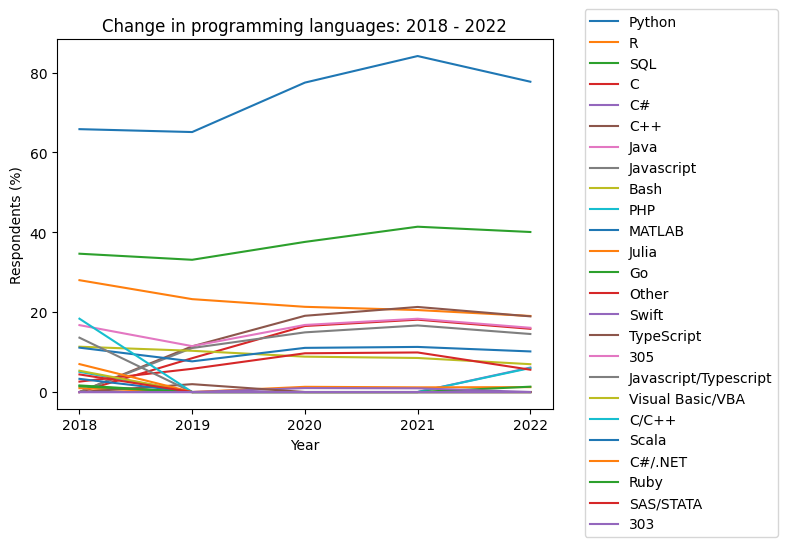

In [11]:
plt.plot(language_df.T.sort_index(), label=language_df.index)
plt.legend(bbox_to_anchor=(1.05, 1.1))
plt.title('Change in programming languages: 2018 - 2022')
plt.ylabel('Respondents (%)')
plt.xlabel('Year')
plt.show()

In [14]:
language_year_count = language_df[language_df > 0].count(axis=1)

In [22]:
filtered_language_df = language_df[language_df.index.isin(language_year_count[language_year_count > 1].index)]

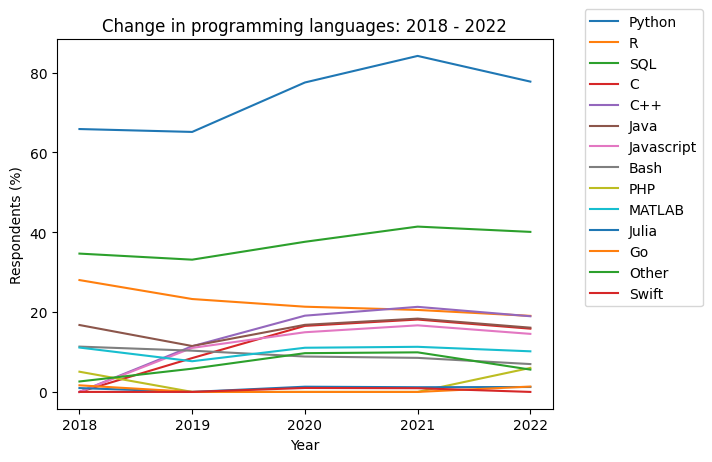

In [23]:
plt.plot(filtered_language_df.T.sort_index(), label=filtered_language_df.index)
plt.legend(bbox_to_anchor=(1.05, 1.1))
plt.title('Change in programming languages: 2018 - 2022')
plt.ylabel('Respondents (%)')
plt.xlabel('Year')
plt.show()

In [ ]:
fig = go.Figure(data=[go.Scatter(name='2020',x=np.array(list(language_growth['2020'].values())), y=list(language_growth['2020'].keys()), mode='markers',\
                                 marker = dict(color=['#b5b5b5']*len(q1_df),opacity=[0.7]*len(q1_df),
                                               size=np.array(list(language_growth['2020'].values()))*2.3)),
                      go.Scatter(name='2021',x=np.array(list(language_growth['2021'].values())), y=list(language_growth['2021'].keys()), mode='markers',\
                                 marker = dict(color=[my_colors[4]]*len(q1_df),opacity=[1.0]*len(q1_df),
                                               size=np.array(list(language_growth['2021'].values()))*2.3))],

                
                layout=go.Layout(title='Language growth',
                                 template='plotly_white',\
                                 font=dict(size=13),
                                 xaxis_title='% of respondents',
                                 xaxis={'showgrid':True,'showticklabels': True, 'dtick':15,\
                                        'range':[0,37],'autorange':True,'fixedrange':True,\
                                        'showline':False},
                                 yaxis={'showgrid':False,'showline':False,'autorange':True,'fixedrange':True},
                                 width=900,height=600)
               )
fig.show()